# convolutional neural network

## trained on mnist dataset

https://keras.io/examples/vision/mnist_convnet/


In [2]:
import numpy as np
import keras
from keras import layers
from pprint import pprint
import pandas as pd
from IPython.display import display
from emnist import extract_training_samples, list_datasets, extract_test_samples
import visualkeras
import matplotlib.pyplot as plt
import tensorflow as tf

2024-03-01 11:27:22.300622: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-01 11:27:22.358260: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-01 11:27:22.359041: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-01 11:27:23.363583: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# dataset_descriptions = {
#     "byclass": "814,255 characters. 62 unbalanced classes. numbers and letters.",
#     "bymerge": "814,255 characters. 47 unbalanced classes. numbers and letters, with similar-looking letters merged.",
#     "balanced": "131,600 characters. 47 balanced classes. numbers and letters, balanced across classes.",
#     "letters": "145,600 characters. 26 balanced classes. letters, balanced across classes.",
#     "digits": "280,000 characters. 10 balanced classes. numbers, balanced across classes.",
#     "mnist": "70,000 characters. 10 balanced classes. numbers, directly compatible with the original MNIST dataset.",
# }

x_train shape: (240000, 28, 28, 1)
240000 train samples
40000 test samples


/home/lokman/anaconda3/envs/gemma/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


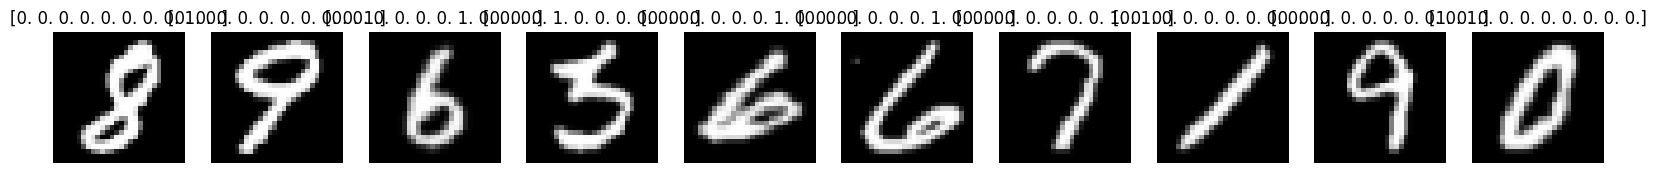

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train) = extract_training_samples("digits")
(x_test, y_test) = extract_test_samples("digits")

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# show the first 10 images
fig, ax = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].set_title(y_train[i])
    ax[i].axis("off")

In [5]:
# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation="softmax"),
#     ]
# )

input_shape = (28, 28, 1)
num_classes = 10

model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            32, kernel_size=(3, 3), activation="relu", input_shape=input_shape
        ),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 10)                216330    
                                                                 
Total params: 216650 (846.29 KB)
Trainable params: 216650 (846.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


563/563 [==============================] - 24s 41ms/step - loss: 0.1779 - accuracy: 0.9522 - val_loss: 0.0784 - val_accuracy: 0.9793


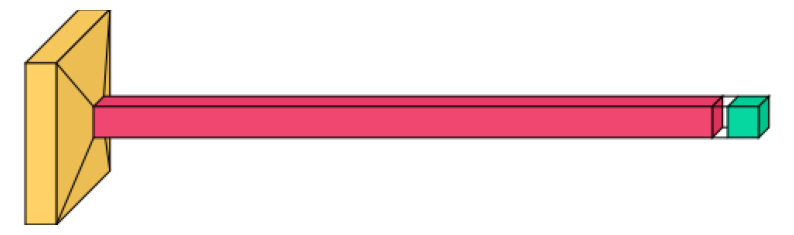

In [6]:
# batch_size = 128
# epochs = 15
# smaller batch size
batch_size = 384
epochs = 1

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
pil_img = visualkeras.layered_view(model)

img_array = np.array(pil_img)

plt.figure(figsize=(10, 10))
plt.imshow(img_array)
plt.axis("off")
plt.show()

In [7]:
import pickle

score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


model.save("../models/mnist_model_digits.h5")

1250/1250 [==============================] - 3s 2ms/step - loss: 0.0729 - accuracy: 0.9794
Test loss: 0.07289040833711624
Test accuracy: 0.9793999791145325


/home/lokman/anaconda3/envs/gemma/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
